#### PYTHON İLE VERİ ANALİZİ DERSİ ÖDEVİ
> https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv, sitesinden winequality-red.csv dosyasını veri setim olarak seçtim ve işlemleri bu veri seti üzerinden yapacağım.

In [1]:
import numpy as np
import pandas as pd
import sys
import ipywidgets
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import keras
from pandas_profiling import ProfileReport

Using TensorFlow backend.


> 1.	Veri seti’ni pandas dataFrame ile okuyunuz.

In [2]:
data = pd.read_csv('winequality-red.csv')

> 2.	DataFrame verileri ile ilgili özet bilgileri ekranda gösteriniz.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


> 3.	Pandas kütüphanesi versiyonu bulunuz.

In [4]:
print('Pandas versiyon: {}'.format(pd.__version__))

Pandas versiyon: 1.0.3


> 4.	Install edilen kütüphaneleri listeleyiniz. Burada Python içerisinde kullanılan kütüphaneleri ve sürümleri inceleyebiliriz.

In [95]:
pip list

Package                            Version            
---------------------------------- -------------------
absl-py                            0.9.0              
alabaster                          0.7.12             
anaconda-client                    1.7.2              
Note: you may need to restart the kernel to use updated packages.anaconda-navigator                 1.9.12             

anaconda-project                   0.8.3              
argh                               0.26.2             
asn1crypto                         1.3.0              
astor                              0.8.0              
astroid                            2.3.3              
astropy                            4.0.1.post1        
atomicwrites                       1.3.0              
attrs                              19.3.0             
autopep8                           1.4.4              
Babel                              2.8.0              
backcall                           0.1.0              

yarg                               0.1.9              
yolk                               0.4.3              
zict                               2.0.0              
zipp                               2.2.0              


> 5.	Python yazılımı versiyonunu bulunuz.

In [5]:
print('Python versiyon: {}'.format(sys.version))

Python versiyon: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


> 6.	Veri setindeki ilk 5 veriyi listeleyiniz. data.head(5) olarak da belirtilebilir.

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


> 7.	Veri setindeki son 5 veriyi listeleyiniz. data.tail(5) olarak da belirtilebilir.

In [7]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


> 8.	Veri setindeki bütün verileri listeleyiniz.

In [8]:
data #Tüm verilerin listesi

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


> 9.	Veri setindeki nümerik alanları listeleyiniz. describe() fonksiyonu ile nümerik alanların istatistiksel bilgilerini görebiliyoruz.

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


> 10.	Veri setindeki nümerik olmayan alanların frekans dağılımını analiz ediniz.

* **Veri setinde nümerik olmayan alan bulunmuyor.**

> 11.	Histogram diyagramını çiziniz. Burada tüm alanlar için histogram grafiği çizdiriyorum.

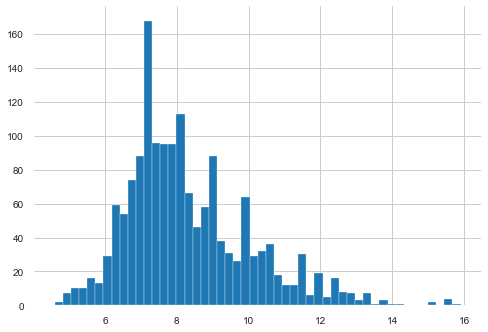

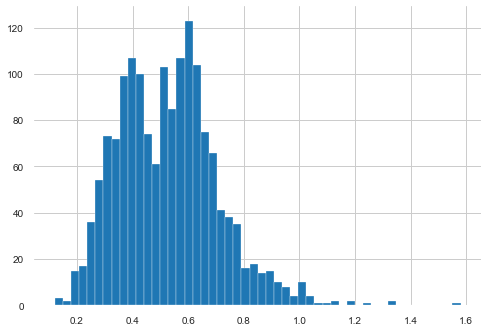

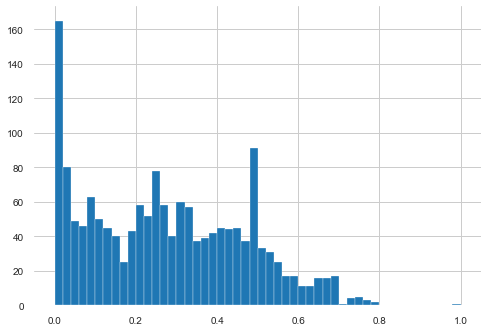

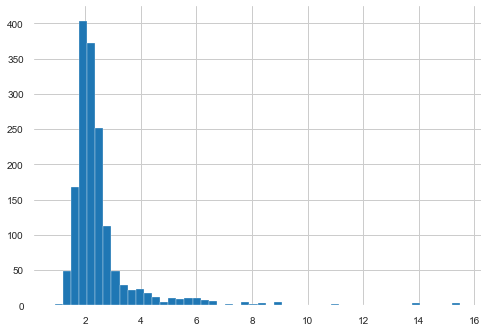

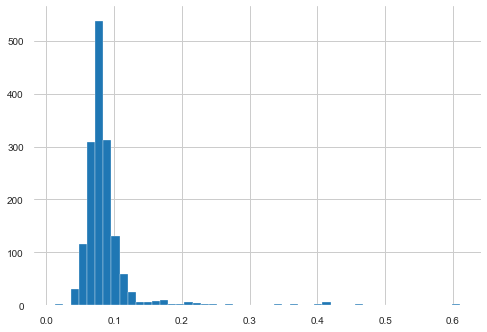

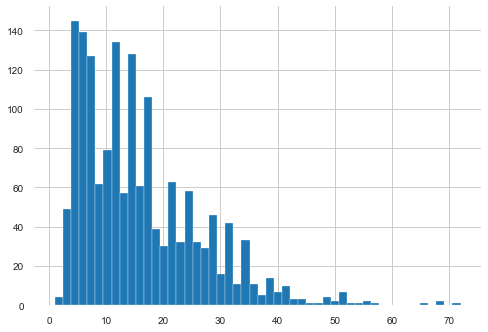

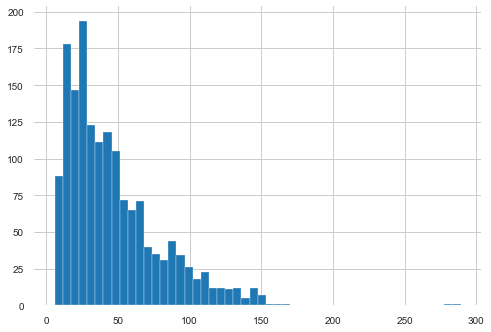

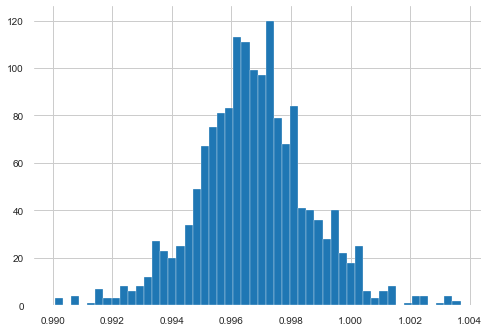

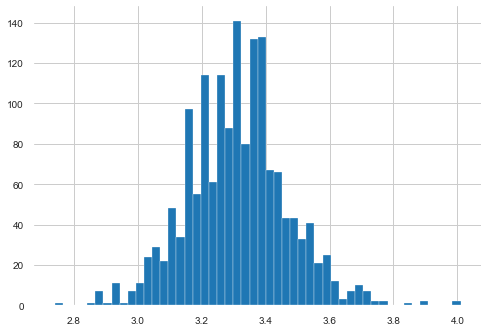

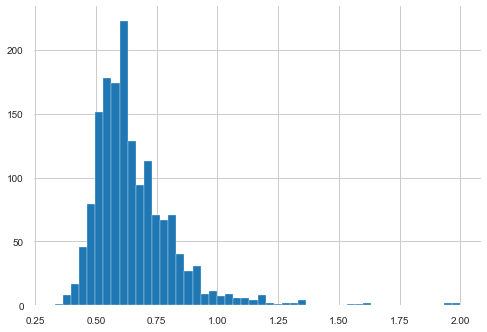

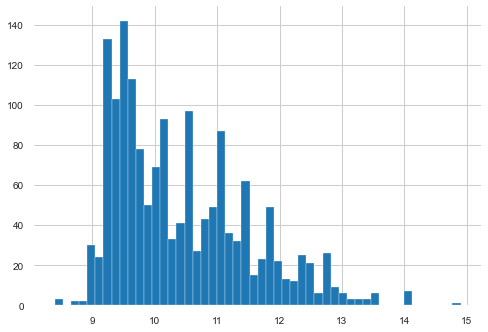

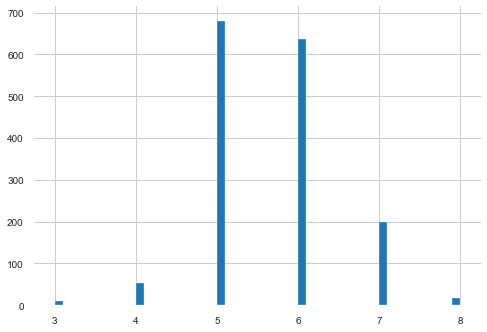

In [11]:
for column in data.columns:
    data[column].hist(bins=50)
    plt.show()

> 12.	Veri setindeki toplam veri sayısını bulunuz.

In [13]:
data.size

19188

> Toplam satır sayısı

In [100]:
len(data)

1599

> 13.	Veri setindeki toplam sütun sayısını bulunuz.

In [101]:
len(data.columns)

12

> 14.	Veri setindeki sütun isimlerini bulunuz.

In [15]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

> 15.	Veri setindeki eksik verileri bulunuz. **Veri setinde eksik veri bulunmuyor.**

In [16]:
data[data.isnull().any(axis=1)].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


> 16.	Her bir sütundaki eksik veri sayısını bulunuz.

In [17]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

> 17.	Bütün sütunlardaki toplam eksik veri sayısını bulunuz.

In [18]:
data.isnull().sum().sum()

0

> 18.	Eksik verilerin yerine ‘0 - sıfır’ yazınız.

* **Veri setinde eksik veri bulunmuyor**

>19.	Eksik verileri dataFrame’den çıkarınız.

* **Veri setinde eksik veri bulunmuyor**

> 20.	Tekrarlı verilerin sayısını bulunuz.

In [102]:
data.pivot_table(index=['quality'], aggfunc='size')

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

> 21.	pandas_profiling kütüphanesini kullanarak dataFrame’deki veriler hakkında “html” rapor hazırlayınız.

In [23]:
report = ProfileReport(data)

In [24]:
report.to_file('VeriAnaliziRaporu.html')

>22.	CSV dosyası olarak link’ten alınan dataFrame’i herhangi bir dizine dataFrame olarak kopyalayınız. Linkteki CSV dosyası ile kaydedilen CSV dosyasının aynı olup olmadığını kontrol ediniz.

In [25]:
datalink = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

**Aşağıdaki kod satırı ile iki dataframe içerisindeki farklılıkları görebiliyoruz. Çıkan sonuç ile bir farklılık olmadığı gözlemleniyor.**

In [26]:
pd.concat([data, datalink]).loc[data.index.symmetric_difference(datalink.index)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


>23.	DataFrame’ki herhangi bir sütunu ekrana alınız ve veri tipini sorgulayınız.

In [27]:
data['fixed acidity'].dtype

dtype('float64')

>24.	Sütunun class’ını sorgulayınız.

In [ ]:
#Sütunun class’ını sorgulayınız.

>25.	DataFrame’de “loc  “ deyimi kullanarak indeks etiketi ile sorgu yapınız.
>>**Bu veri setinde indeks etiketleri nümeriktir.**

In [29]:
data.loc[999] #indeks etiketi numara olduğu için

fixed acidity            6.40000
volatile acidity         0.69000
citric acid              0.00000
residual sugar           1.65000
chlorides                0.05500
free sulfur dioxide      7.00000
total sulfur dioxide    12.00000
density                  0.99162
pH                       3.47000
sulphates                0.53000
alcohol                 12.90000
quality                  6.00000
Name: 999, dtype: float64

>26.	DataFrame’de “iloc  “ deyimi kullanarak indeks numarası ile sorgu yapınız.

In [30]:
data.iloc[999]

fixed acidity            6.40000
volatile acidity         0.69000
citric acid              0.00000
residual sugar           1.65000
chlorides                0.05500
free sulfur dioxide      7.00000
total sulfur dioxide    12.00000
density                  0.99162
pH                       3.47000
sulphates                0.53000
alcohol                 12.90000
quality                  6.00000
Name: 999, dtype: float64

> 27.	Satır ve sütunu birlikte seçerek “loc” deyimi ile sorgu yazınız.

In [31]:
data.loc[999,['pH']]

pH    3.47
Name: 999, dtype: float64

> 28.	loc () deyimini kullanarak dataFrame’de “Slicing” işlemi yapınız.

In [32]:
data.loc[99:105:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
99,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.9972,3.30,0.59,9.0,6
100,8.3,0.610,0.30,2.1,0.084,11.0,50.0,0.9972,3.40,0.61,10.2,6
101,7.8,0.500,0.30,1.9,0.075,8.0,22.0,0.9959,3.31,0.56,10.4,6
102,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.9972,3.30,0.59,9.0,6
103,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2,5
104,7.2,0.490,0.24,2.2,0.070,5.0,36.0,0.9960,3.33,0.48,9.4,5
105,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2,5


> 29.	DataFrame’de filtreleme işlemi yapınız.

In [33]:
data[data.pH < 5][['alcohol','pH']]

,alcohol,pH
0,9.4,3.51
1,9.8,3.20
2,9.8,3.26
3,9.8,3.16
4,9.4,3.51
...,...,...
1594,10.5,3.45
1595,11.2,3.52
1596,11.0,3.42
1597,10.2,3.57


>30.	DataFrame’de indeksi sıfırlayınız.

In [34]:
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


>31.	dataFrame’e yeni bir sütun ilave ediniz.

In [35]:
data['ys'] = data['pH'] * data['density'] / data['alcohol']
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ys
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.372583
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.325486
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.331655
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.321804
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.372583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.326896
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.312752
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.309585
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.348415


>32.	DataFrame’den bir sütunu geçici olarak siliniz.

In [36]:
data.drop(['ys'], axis='columns')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


>33.	DataFrame’den bir sütunu kalıcı olarak siliniz.

In [37]:
del data['ys']
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


>34.	DataFrame hakkında genel bilgiyi ekranda listeleyiniz.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


>35.	System Kütüphanesi versiyonunu bulunuz.

In [105]:
print("System kütüphanesi versiyonu: {}".format(sys.version))

System kütüphanesi version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


>**36.**	Pandas Kütüphanesi versiyonunu bulunuz.

In [40]:
print("Pandas kütüphanesi versiyonu: {}".format(pd.__version__))

Pandas version: 1.0.3


>**37.**	Matplotlib kütüphanesi versiyonunu bulunuz.

In [41]:
print("Matplotlib kütüphanesi versiyonu: {}".format(matplotlib.__version__))

Matplotlib version: 3.2.1


>**38.**	Keras kütüphanesi versiyonunu bulunuz.

In [42]:
print("Keras kütüphanesi versiyonu: {}".format(keras.__version__))

Keras version: 2.3.1


>**39.**	“pd.pivot.table()” metodunu kullanarak, dataFrame’deki bir sütundan tek indeksli “pivot table” oluşturunuz.

In [43]:
pd.pivot_table(data,index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,2.577778,0.767778,33.444444,0.423333


>**40.**	“pd.pivot.table()” metodunu kullanarak, dataFrame’deki birden fazla sütundan çok indeksli “pivot table” oluşturunuz.

In [44]:
pd.pivot_table(data,index=['quality', 'pH'])

alcohol  chlorides  citric acid  density  fixed acidity  \
quality pH                                                              
3       3.16     8.40      0.200        0.490  0.99940          10.40   
        3.25     9.00      0.074        0.660  1.00080          11.60   
        3.31     9.70      0.061        0.050  0.99705           7.30   
        3.32     9.80      0.267        0.000  0.99471           6.80   
        3.38     9.90      0.145        0.420  0.99832          10.40   
...               ...        ...          ...      ...            ...   
8       3.35    12.25      0.073        0.425  0.99623           8.25   
        3.46    12.70      0.065        0.090  0.99417           7.80   
        3.50    14.00      0.044        0.030  0.99080           5.50   
        3.56    12.90      0.045        0.050  0.99240           5.60   
        3.72    14.00      0.060        0.240  0.99170           5.00   

              free sulfur dioxide  residual sugar  sulphates  \
quality pH                                                     
3       3.16                  5.0             2.1      0.630   
        3.25                 10.0             2.2      0.570   
        3.31                 20.0             2.1      0.550   
        3.32                 16.0             1.2      0.510   
        3.38                 34.0             1.5      0.860   
...                           ...             ...        ...   
8       3.35                 10.5             2.7      0.775   
        3.46                 34.0             2.3      0.740   
        3.50                 28.0             1.8      0.820   
        3.56                 12.0             1.4      0.820   
        3.72                 19.0             2.0      0.740   

              total sulfur dioxide  volatile acidity  
quality pH                                            
3       3.16                  16.0             0.610  
        3.25                  47.0             0.580  
        3.31                  49.0             0.980  
        3.32                  29.0             0.815  
        3.38                  48.0             0.440  
...                            ...               ...  
8       3.35                  24.5             0.385  
        3.46                  45.0             0.570  
        3.50                  87.0             0.490  
        3.56                  88.0             0.850  
        3.72                  50.0             0.420  

[270 rows x 10 columns]

>**41.**	Pivot_table’da “aggfunc=np.sum” gonksiyonunu kullanınız.

In [45]:
pd.pivot_table(data,index=['quality', 'pH'],values=['alcohol'],aggfunc=np.sum)

alcohol
quality pH           
3       3.16      8.4
        3.25      9.0
        3.31      9.7
        3.32      9.8
        3.38      9.9
...               ...
8       3.35     24.5
        3.46     12.7
        3.50     14.0
        3.56     12.9
        3.72     14.0

[270 rows x 1 columns]

>**42.**	dataFrame’i CSV dosyası olarak kaydediniz.

In [46]:
data.to_csv('datacsv.csv')

>**43.**	dataFrame’i EXCEL dosyası olarak kaydediniz.

In [47]:
data.to_excel('dataexcel.xlsx')

>**44.**	dataFrame’i HTML dosyası olarak kaydediniz.

In [48]:
data.to_html('datahtml.html')

>**45.**	dataFrame’i JSON dosyası olarak kaydediniz.

In [49]:
data.to_json('datajson.json')

>**46.**	dataFrame’i txt dosya olarak kaydediniz.

In [50]:
#np.savetxt(r'datatxt.txt', data, fmt='%d', delimiter='\t')

>**47.**	dataFrame’deki bir sütunu küçükten büyüğe sıralayınız.

In [51]:
data.sort_values(by='quality')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
1090,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
1449,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8


>**48.**	dataFrame’deki bir sütunu büyükten küçüğe sıralayınız.

In [52]:
data.sort_values(by='quality', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.420,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3


>**49.**	dataFrame’deki iki sütunu küçükten büyüğe sıralayınız.

In [53]:
data.sort_values(by=['quality', 'pH'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
517,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1469,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1202,8.6,0.420,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
828,7.8,0.570,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8
390,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8


>**50.**	dataFrame’deki iki sütunu büyükten küçüğe sıralayınız.

In [54]:
data.sort_values(by=['quality', 'pH'], ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
588,5.0,0.420,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
390,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8
828,7.8,0.570,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8
267,7.9,0.350,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
...,...,...,...,...,...,...,...,...,...,...,...,...
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
1469,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3


>**51.** Scatter Plot Grafiği

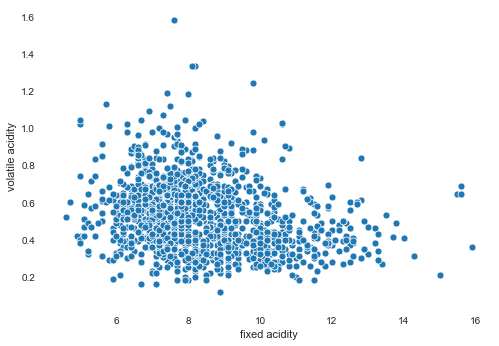

In [57]:
ax = sns.scatterplot(x="fixed acidity", y="volatile acidity", data=data)

>**52.** Histogram Grafiği

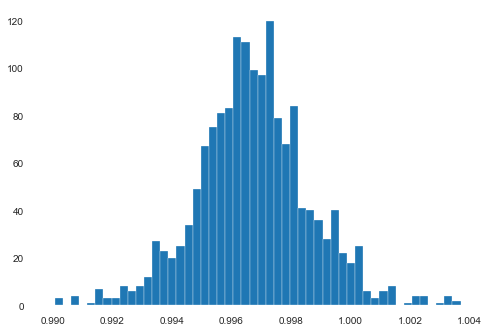

In [64]:
plt.hist(x='density', bins=50, data=data)
plt.show()

>**53.** Bar Chart Grafiği

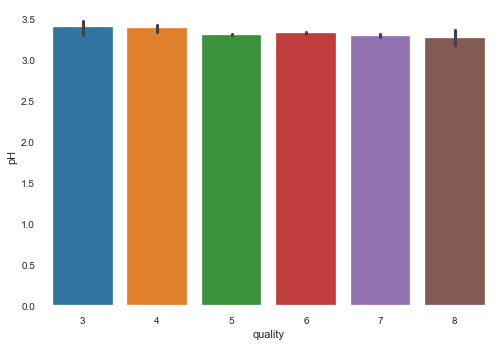

In [67]:
ax = sns.barplot(x='quality', y="pH", data=data)

>**54.** Pie Chart Grafiği

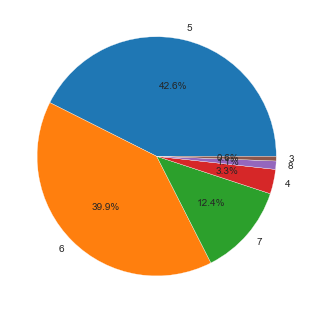

In [77]:
plt.pie(data['quality'].value_counts().values, labels=data['quality'].value_counts().index, autopct='%1.1f%%')
plt.show()

>**55.** Heatmap Grafiği

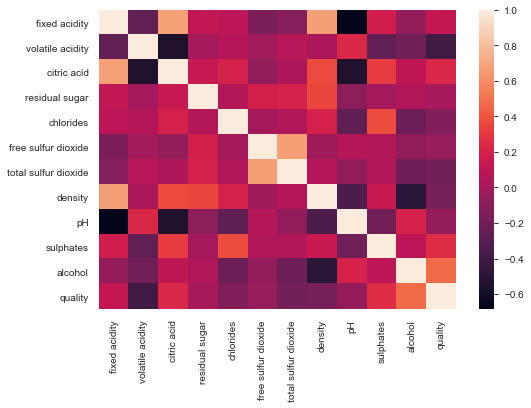

In [86]:
corr = data.corr()
ax = sns.heatmap(corr)

>**56.** Seaborn Stripplot Grafiği

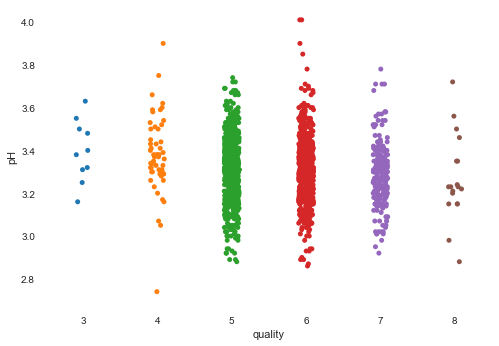

In [84]:
ax = sns.stripplot(x='quality', y='pH', data=data)

>**57.** Seaborn Swarmplot Grafiği

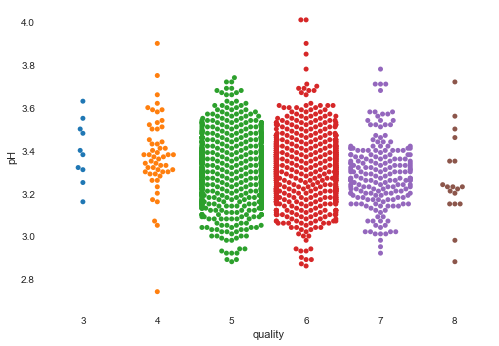

In [85]:
ax = sns.swarmplot(x='quality', y='pH', data=data)